Лабораторна робота 7

 1. Виконати вирішення задач регресії та класифікації для наборів даних, що використовувалися в лабораторних роботах 3 та 5 з використанням Tensorflow & NN.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


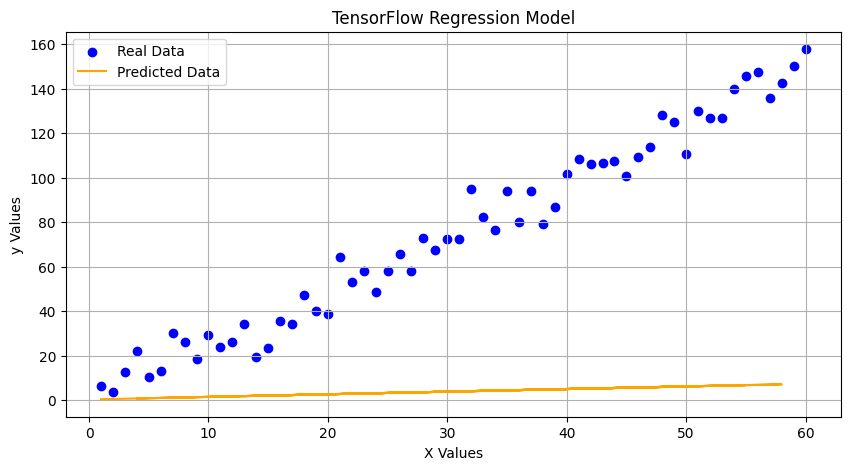

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Regression MSE: 7250.6356162637385
Classification Accuracy: 0.8366666666666667

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.87      0.83       135
           1       0.89      0.81      0.84       165

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



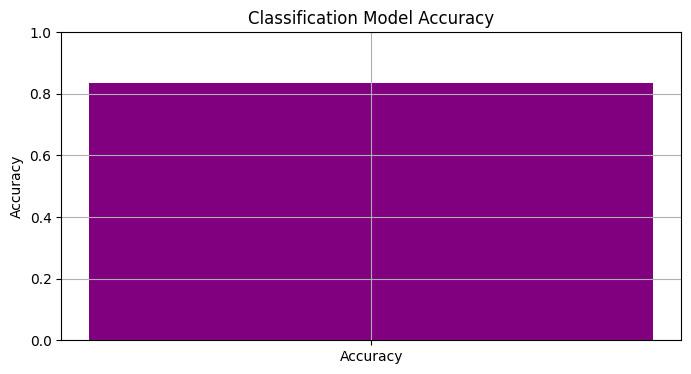

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# 1. Regression Task (Lab 3): Generate synthetic data and train a regression model with TensorFlow
# Generate synthetic regression data
X_reg = np.arange(1, 61).reshape(-1, 1)  # Independent variable
y_reg = 2.5 * X_reg.flatten() + np.random.normal(0, 8, X_reg.shape[0])  # Dependent variable with noise

# Train-test split for regression data
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

# Define the regression model using Input layer
reg_model = Sequential([
    Input(shape=(1,)),  # Замість input_dim використовується Input(shape)
    Dense(10, activation="relu"),
    Dense(1)  # Output layer for regression
])
reg_model.compile(optimizer="adam", loss="mse", metrics=["mae"])

# Train the model
reg_model.fit(X_reg_train, y_reg_train, epochs=100, verbose=0)

# Predict and evaluate
y_reg_pred = reg_model.predict(X_reg_test)
mse_reg = mean_squared_error(y_reg_test, y_reg_pred)

# Plot results for regression
plt.figure(figsize=(10, 5))
plt.scatter(X_reg, y_reg, color='blue', label='Real Data')
plt.plot(X_reg_test, y_reg_pred, color='orange', label='Predicted Data')
plt.xlabel("X Values")
plt.ylabel("y Values")
plt.title("TensorFlow Regression Model")
plt.legend()
plt.grid(True)
plt.show()

# 2. Classification Task (Lab 5): Generate and load data, then train a classification model with TensorFlow
# Generate synthetic classification data
X_clf, y_clf = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)
X_clf_train, X_clf_test, y_clf_train, y_clf_test = train_test_split(X_clf, y_clf, test_size=0.3, random_state=42)

# Define the classification model using Input layer
clf_model = Sequential([
    Input(shape=(X_clf.shape[1],)),  # Замість input_dim використовується Input(shape)
    Dense(10, activation="relu"),
    Dense(10, activation="relu"),
    Dense(1, activation="sigmoid")  # Output layer for binary classification
])
clf_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train the classification model
clf_model.fit(X_clf_train, y_clf_train, epochs=50, verbose=0)

# Predict and evaluate classification model
y_clf_pred_prob = clf_model.predict(X_clf_test)
y_clf_pred = (y_clf_pred_prob > 0.5).astype(int).flatten()

# Classification accuracy
accuracy_clf = accuracy_score(y_clf_test, y_clf_pred)

# Full classification report
clf_report = classification_report(y_clf_test, y_clf_pred)

print("Regression MSE:", mse_reg)
print("Classification Accuracy:", accuracy_clf)
print("\nClassification Report:\n", clf_report)

# Візуалізація точності класифікації
plt.figure(figsize=(8, 4))
plt.bar(['Accuracy'], [accuracy_clf], color='purple')
plt.ylim(0, 1)
plt.title('Classification Model Accuracy')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()
